# Linear regression using LASSO

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize

from utils import get_dataframe, get_astronomical_seasons

Load data:

In [102]:
df = get_dataframe(solar_noon_altitudes=True)

X = df.drop(["RSKF", "Datum und Uhrzeit", "Gesamtanlage[kWh]"], axis=1) # TODO: Use RSKF
columns = X.columns
X_norm, norms = normalize(X, axis=0, return_norm=True) # Normalize features to get an idea about their importance.
y = df["Gesamtanlage[kWh]"]

Train linear regression model:

In [103]:
alpha = 2.5e-3 # Regularization factor
reg = Lasso(alpha).fit(X_norm, y)

#coefficients = pd.concat([pd.DataFrame(columns),pd.DataFrame(np.transpose(reg.coef_))], axis=1)
#print(coefficients)

reg.coef_ = reg.coef_ / norms # Now reg can be applied on unnormalized data.

coefficients = pd.concat([pd.DataFrame(columns),pd.DataFrame(np.transpose(reg.coef_))], axis=1)
print(coefficients)

print("Regularization factor: ", alpha)
print("R^2: ", reg.score(X,y))

                       0          0
0                     FX   0.000000
1                     FM   0.000000
2                    RSK  -0.086906
3                    SDK   1.412718
4                SHK_TAG   0.000000
5                     NM  -0.001057
6                    VPM   0.000000
7                     PM  -0.000000
8                    TMK   0.077505
9                    UPM  -0.002832
10                   TXK   0.000000
11                   TNK   0.000000
12                   TGK   0.000000
13  Solar noon altitudes  25.084989
Regularization factor:  0.0025
R^2:  0.924185444318673


c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [53]:
#print(reg.coef_)

Plotting:

In [ ]:
# Code taken from exploratory_analysis.ipynb and adapted:

In [104]:
from datetime import datetime

data = get_dataframe(solar_noon_altitudes=True)
# remove whitespace at beginning of column name
data.columns = [col.strip() for col in data.columns]
data.head()


# drop 29.02.2020 because there is no value in the other years to compare
data = data.drop(data[data["Datum und Uhrzeit"] == "29.02.2020"].index).reset_index()
data = data.drop("index", axis=1)

# add column for year, month and day of the year
# convert "Datum und Uhrzeit" column to date
data["Date"] = [datetime.strptime(data["Datum und Uhrzeit"][i], "%d.%m.%Y") for i in range(len(data))]
data["Year"] = data["Date"].dt.year
data["Day of year"] = data["Date"].dt.dayofyear
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data = data.drop("Date", axis=1)

c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has 

For 2019 the MSE is 12.11.
For 2020 the MSE is 13.66.
For 2021 the MSE is 13.11.
For 2022 the MSE is 14.59.


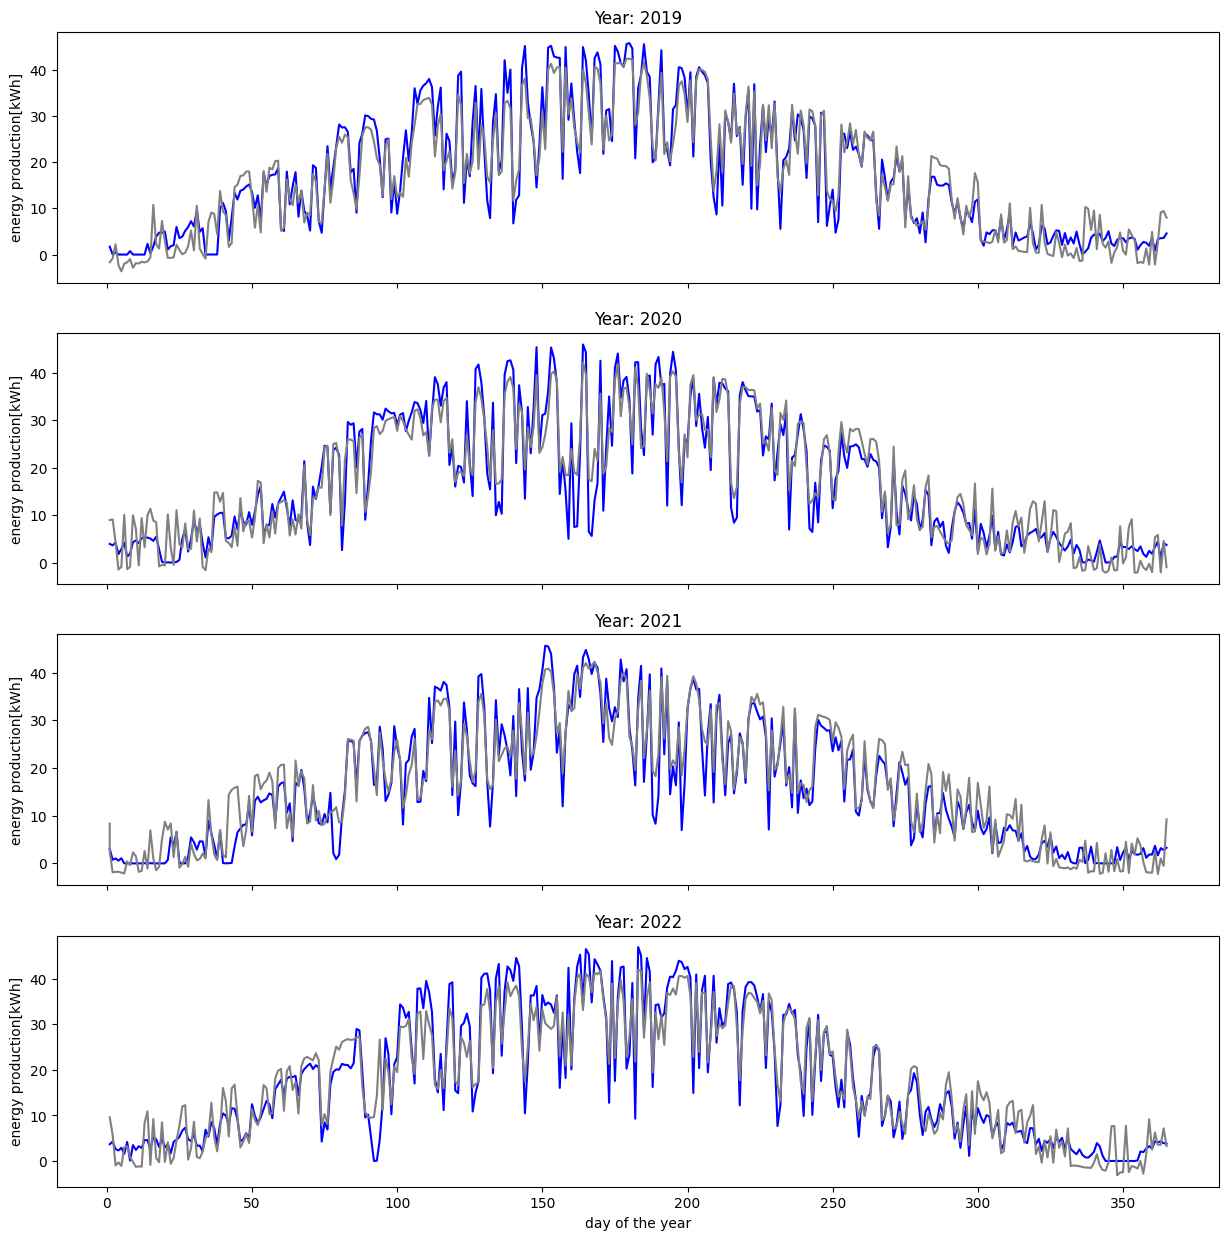

In [107]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    year_data = data[data["Year"] == year]

    X = year_data.drop(["RSKF", "Datum und Uhrzeit", "Year", "Day of year", "Month", "Day", "Gesamtanlage[kWh]"], axis=1)

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )

    #plot predictions
    ax.plot(
        year_data["Day of year"],
        reg.predict(X),
        color="grey"
    )
        
    ax.set_ylabel("energy production[kWh]")
    i += 1


    # compute mean squared error:
    mse = mean_squared_error(year_data["Gesamtanlage[kWh]"], reg.predict(X))
    print(f"For {year} the MSE is {mse:.2f}.")

    
axes[3].set_xlabel("day of the year")
plt.show()

Regression for individual seasons:

In [108]:
data["Season"] = data.apply(get_astronomical_seasons, axis=1)

In [109]:
reg_by_season = {}
X_by_season = {}
y_by_season = {}

for season in ["winter", "spring", "summer", "fall"]:

    data_s = data[data["Season"] == season]
    X_s = data_s.drop(["Season", "RSKF", "Datum und Uhrzeit", "Year", "Day of year", "Month", "Gesamtanlage[kWh]"], axis=1)
    X_s_norm, norms_s = normalize(X_s, axis=0, return_norm=True) # Normalize features to get an idea about their importance.
    y_s = data_s["Gesamtanlage[kWh]"]

    alpha_s = alpha # Same regularization factor
    reg_s = Lasso(alpha_s, max_iter=8000).fit(X_s_norm, y_s)

    reg_s.coef_ = reg_s.coef_ / norms_s # Now reg_s can be applied on unnormalized data.

    reg_by_season[season] = reg_s
    X_by_season[season] = X_s
    y_by_season[season] = y_s
"""
coefficients = pd.concat([pd.DataFrame(columns),pd.DataFrame(np.transpose(reg.coef_))], axis=1)
print(coefficients)

print("Regularization factor: ", alpha)
print("R^2: ", reg.score(X,y))
"""

'\ncoefficients = pd.concat([pd.DataFrame(columns),pd.DataFrame(np.transpose(reg.coef_))], axis=1)\nprint(coefficients)\n\nprint("Regularization factor: ", alpha)\nprint("R^2: ", reg.score(X,y))\n'

winter


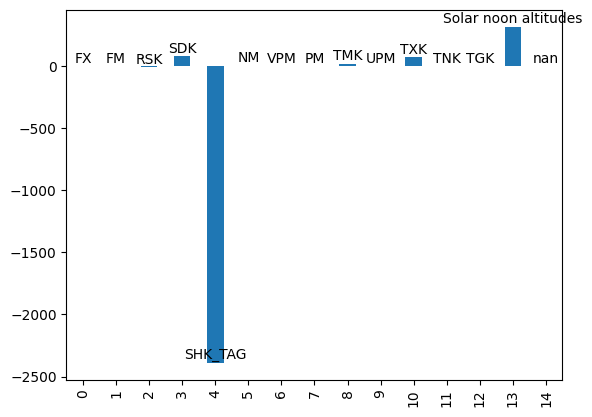

spring


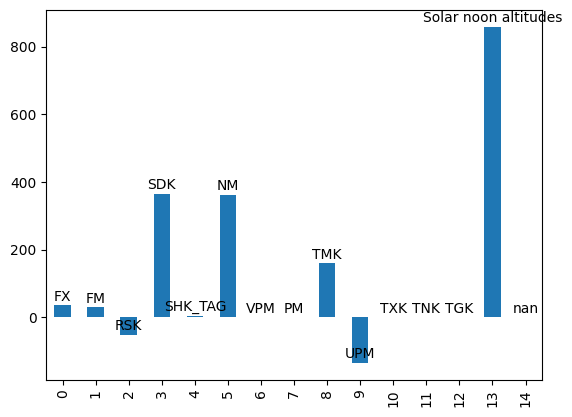

summer


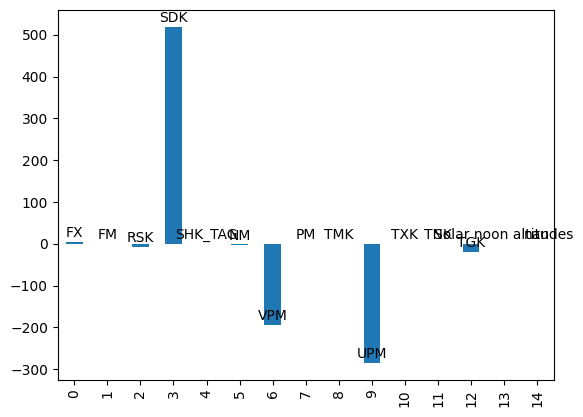

fall


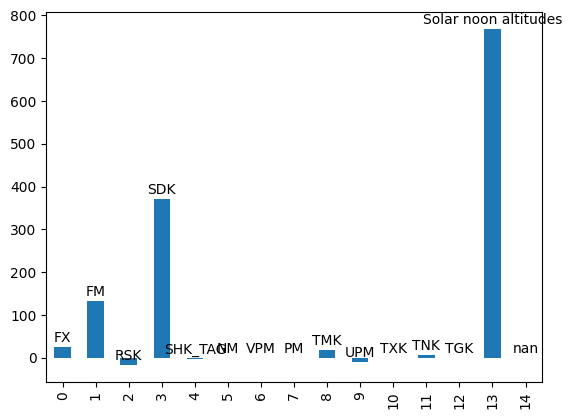

In [142]:
# https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart

for season in ["winter", "spring", "summer", "fall"]:
    print(season)
    coefficients = pd.concat([pd.DataFrame(columns),pd.DataFrame(np.transpose(reg_by_season[season].coef_))], axis=1)
    values = coefficients.iloc[:, 1] * np.hstack((norms, [1]))
    ax = values.plot(kind="bar")
    #plt.xlabel(coefficients.iloc[:, 0])
       
    rects = ax.patches

    # Make some labels.
    labels = coefficients.iloc[:, 0]

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )

    plt.show()

In [89]:
#reg_by_season["fall"].predict(X_by_season["fall"])

In [111]:
def reg_using_season(row):
    sample = row.drop(["Season"])
    sample = np.array(sample)
    sample = sample.reshape(1, -1)
    return reg_by_season[row["Season"]].predict(sample)

C:\Users\Leo\AppData\Local\Temp\ipykernel_21920\2501468914.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data["Season"] = year_data.apply(get_astronomical_seasons, axis=1)


For 2019 the MSE is 7.43.


C:\Users\Leo\AppData\Local\Temp\ipykernel_21920\2501468914.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data["Season"] = year_data.apply(get_astronomical_seasons, axis=1)


For 2020 the MSE is 7.36.


C:\Users\Leo\AppData\Local\Temp\ipykernel_21920\2501468914.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data["Season"] = year_data.apply(get_astronomical_seasons, axis=1)


For 2021 the MSE is 7.19.


C:\Users\Leo\AppData\Local\Temp\ipykernel_21920\2501468914.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data["Season"] = year_data.apply(get_astronomical_seasons, axis=1)


For 2022 the MSE is 8.82.


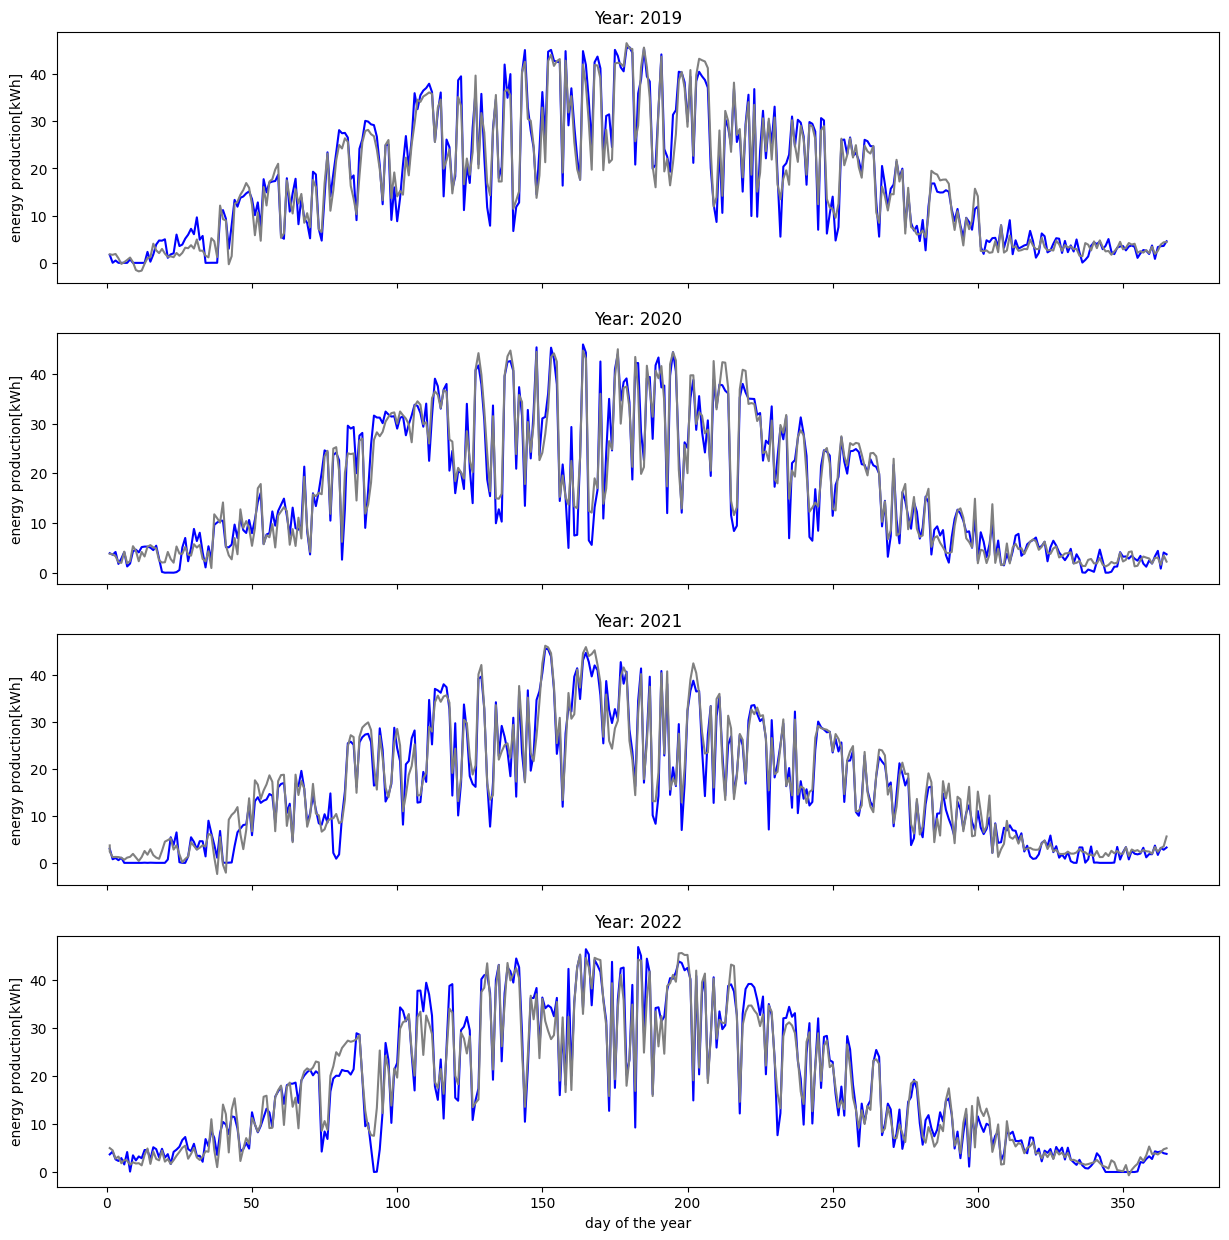

In [141]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    year_data = data[data["Year"] == year]

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )


    year_data["Season"] = year_data.apply(get_astronomical_seasons, axis=1)
    X = year_data.drop(["RSKF", "Datum und Uhrzeit", "Year", "Day of year", "Month", "Gesamtanlage[kWh]"], axis=1)
    pred_using_season = X.apply(reg_using_season, axis=1)

    #plot predictions
    ax.plot(
        year_data["Day of year"],
        pred_using_season,
        color="grey"
        )
        
    ax.set_ylabel("energy production[kWh]")
    i += 1


    # compute mean squared error:
    mse = mean_squared_error(year_data["Gesamtanlage[kWh]"], pred_using_season)
    print(f"For {year} the MSE is {mse:.2f}.")

    
axes[3].set_xlabel("day of the year")
plt.show()